In [1]:
import pandas as pd
import numpy as np

In [2]:
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from sklearn.model_selection import GridSearchCV

In [132]:
train = pd.read_csv('updated_train.csv')
test = pd.read_csv('updated_test.csv')
train.head()

,roadId,totalLaneLines,laneLineId,laneLineCoordinates,totalLinesOnLeft,totalLaneLinesOnRight,distFromLaneLineOnLeft,distFromLaneLineOnRight,laneLineLength,roadLength,...,roadCategory,roadCoordinates,noOfLanes,lane_sum,line_sum,Lines_sum,cat_len_count,cat_id_count,len_id_count,lane_cat_count
0,3177248677,3,1.317725e+10,11.117636626741222 49.43799310961545|11.11761...,2,0,3.863433,3.270934,4.396337,40.57071,...,2,11.11747 49.43763|11.11753 49.43776|11.11761 ...,2,7.134367,0,2,5,5,5,3
1,3177248677,3,1.317725e+10,11.11771009862968 49.43794191822495|11.117697...,0,2,3.238623,3.740901,37.316844,40.57071,...,2,11.11747 49.43763|11.11753 49.43776|11.11761 ...,2,6.979524,0,2,5,5,5,3
2,3177248677,3,2.317725e+10,11.117673197144772 49.43796782435575|11.11765...,1,1,3.740901,3.863433,40.365319,40.57071,...,2,11.11747 49.43763|11.11753 49.43776|11.11761 ...,2,7.604335,0,2,5,5,5,3
3,3177248677,2,1.317725e+10,11.117480629929192 49.43781578147865|11.11742...,1,0,3.376378,3.270934,19.342362,40.57071,...,2,11.11747 49.43763|11.11753 49.43776|11.11761 ...,2,6.647312,0,1,5,5,5,2
4,3177248677,2,1.317725e+10,11.117587468615081 49.43799962846225|11.11751...,0,1,3.238623,3.376378,42.007669,40.57071,...,2,11.11747 49.43763|11.11753 49.43776|11.11761 ...,2,6.615001,0,1,5,5,5,2


In [5]:
train.dtypes

roadId                              int64
totalLaneLines                      int64
laneLineId                        float64
laneLineCoordinates                object
totalLinesOnLeft                    int64
totalLaneLinesOnRight               int64
distFromLaneLineOnLeft            float64
distFromLaneLineOnRight           float64
laneLineLength                    float64
roadLength                        float64
noOfIntersectingLaneLinesLeft       int64
noOfIntersectingLaneLinesRight      int64
isIntersectingWithRoadGeometry      int64
roadCategory                        int64
roadCoordinates                    object
noOfLanes                           int64
lane_sum                          float64
line_sum                            int64
Lines_sum                           int64
cat_len_count                       int64
cat_id_count                        int64
len_id_count                        int64
lane_cat_count                      int64
dtype: object

In [6]:
test.dtypes

roadId                              int64
totalLaneLines                      int64
laneLineId                        float64
laneLineCoordinates                object
totalLinesOnLeft                    int64
totalLaneLinesOnRight               int64
distFromLaneLineOnLeft            float64
distFromLaneLineOnRight           float64
laneLineLength                    float64
roadLength                        float64
noOfIntersectingLaneLinesLeft       int64
noOfIntersectingLaneLinesRight      int64
isIntersectingWithRoadGeometry      int64
roadCategory                        int64
lane_sum                          float64
line_sum                            int64
Lines_sum                           int64
cat_len_count                       int64
cat_id_count                        int64
len_id_count                        int64
lane_cat_count                      int64
dtype: object

In [284]:
train['isIntersectingWithRoadGeometry'].head()

0    0
1    0
2    0
3    0
4    0
Name: isIntersectingWithRoadGeometry, dtype: int64

In [143]:
road_len_count = train.groupby(['roadId','laneLineLength']).size().reset_index()
road_len_count.columns = ['roadId','laneLineLength','road_len_count']

road_len_count_test = test.groupby(['roadId','laneLineLength']).size().reset_index()
road_len_count_test.columns = ['roadId','laneLineLength','road_len_count']

In [195]:
def upd(x):
    x = x.split('|')
    return len(x)

In [196]:
train['lane_line_count'] = train['laneLineCoordinates'].apply(lambda x:upd(x))

In [204]:
test['lane_line_count'] = test['laneLineCoordinates'].apply(lambda x:upd(x))

In [324]:
train['left_mul_right'] = train['totalLinesOnLeft']* train['totalLaneLinesOnRight']

In [325]:
test['left_mul_right'] = test['totalLinesOnLeft']* test['totalLaneLinesOnRight']

In [333]:
train['length_div_lane'] = train['roadLength']/train['totalLaneLines']
test['length_div_lane'] = test['roadLength']/test['totalLaneLines']

In [342]:
train['total_length'] = train['roadLength']+train['laneLineLength']
test['total_length'] = test['roadLength']+test['laneLineLength']

In [244]:
train['lane_line_count'].describe()

count    28914.000000
mean        12.440755
std         14.359209
min          2.000000
25%          5.000000
50%          8.000000
75%         15.000000
max        831.000000
Name: lane_line_count, dtype: float64

In [147]:
train = train.merge(road_len_count)
test  = test.merge(road_len_count_test)

In [197]:
len(train),len(test)

(28914, 2493)

In [334]:
train.columns

Index(['roadId', 'totalLaneLines', 'laneLineId', 'laneLineCoordinates',
       'totalLinesOnLeft', 'totalLaneLinesOnRight', 'distFromLaneLineOnLeft',
       'distFromLaneLineOnRight', 'laneLineLength', 'roadLength',
       'noOfIntersectingLaneLinesLeft', 'noOfIntersectingLaneLinesRight',
       'isIntersectingWithRoadGeometry', 'roadCategory', 'roadCoordinates',
       'noOfLanes', 'lane_sum', 'line_sum', 'Lines_sum', 'cat_len_count',
       'cat_id_count', 'len_id_count', 'lane_cat_count', 'lane_len_count',
       'road_len_count', 'lane_line_count', 'left_mul_right',
       'length_div_lane'],
      dtype='object')

In [341]:
train['roadLength'].describe()

count    28914.000000
mean       127.074585
std        149.188223
min          3.635407
25%         43.211669
50%         81.102341
75%        155.920928
max       1756.787694
Name: roadLength, dtype: float64

In [122]:
import os
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-6.3.0-posix-seh-rt_v5-rev1\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
from xgboost.sklearn import XGBClassifier

In [343]:
features =  ['roadId','totalLaneLines','laneLineId',
           'totalLinesOnLeft', 'totalLaneLinesOnRight', 'distFromLaneLineOnLeft',
           'distFromLaneLineOnRight', 'laneLineLength', 'roadLength',
           'noOfIntersectingLaneLinesLeft', 'noOfIntersectingLaneLinesRight',
           'roadCategory','lane_sum','line_sum','cat_len_count','cat_id_count','len_id_count','Lines_sum']

In [360]:
xgb = XGBClassifier(learning_rate =0.01, n_estimators=1 0000, max_depth=6,
                    min_child_weight=3, gamma=0.01, subsample=0.8, colsample_bytree=0.8,
                    objective= 'multi:softmax', nthread=4, seed=2017)

In [361]:
xgb.fit(train[features],train['noOfLanes'])
print('fitting is done')

fitting is done


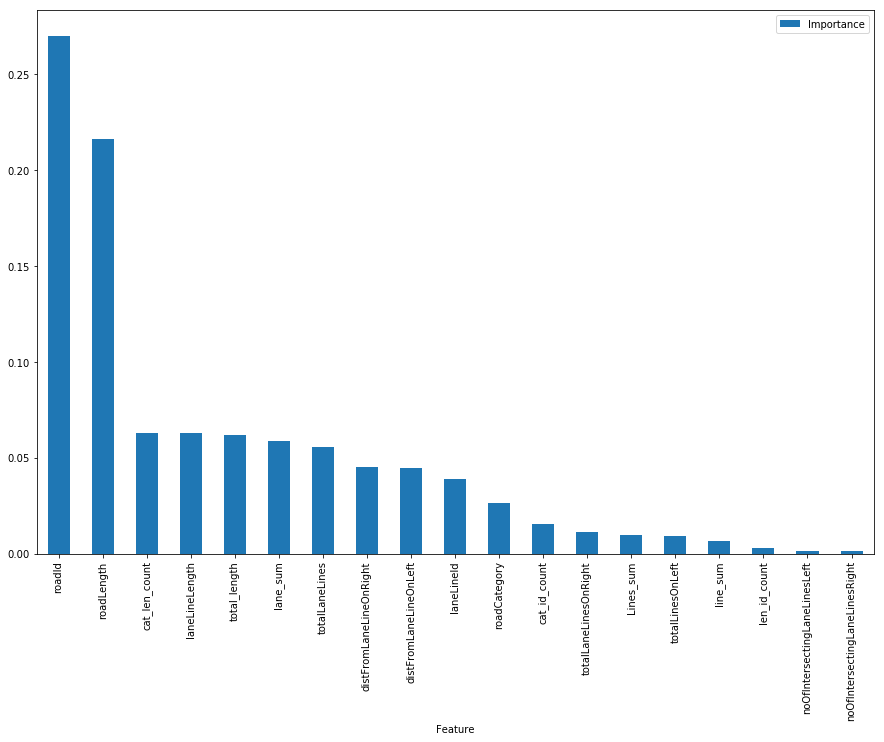

In [362]:
feature_importance = pd.Series(xgb.feature_importances_)
feature_ser = pd.Series(features)
lis = pd.Series(feature_importance.values,index = feature_ser)
lis = sorted(lis.items(),key =lambda x:(-x[1],x[0]))
df = pd.DataFrame(lis, columns=['Feature', 'Importance'])
df.plot(kind='bar',x='Feature',figsize=(15,10))

In [363]:
pred1 = xgb.predict(test[features])
print('prediction is done')

prediction is done


In [364]:
sub1 = pd.DataFrame()
sub1['roadId'] = test['roadId']
sub1['noOfLanes'] = pred1
sub1.to_csv('xgb.csv', index=False)
print('writting is done.')

writting is done.


In [ ]:
x = sub.drop_duplicates(subset=['roadId'],keep='last')
x.to_csv('xgb.csv', index=False)
print('writting is done.')

In [ ]:
x.head()

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [349]:
rf = RandomForestClassifier(criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=2017,warm_start=False)

In [321]:
rf.fit(train[features],train['noOfLanes'])
print('fitting is done')

fitting is done


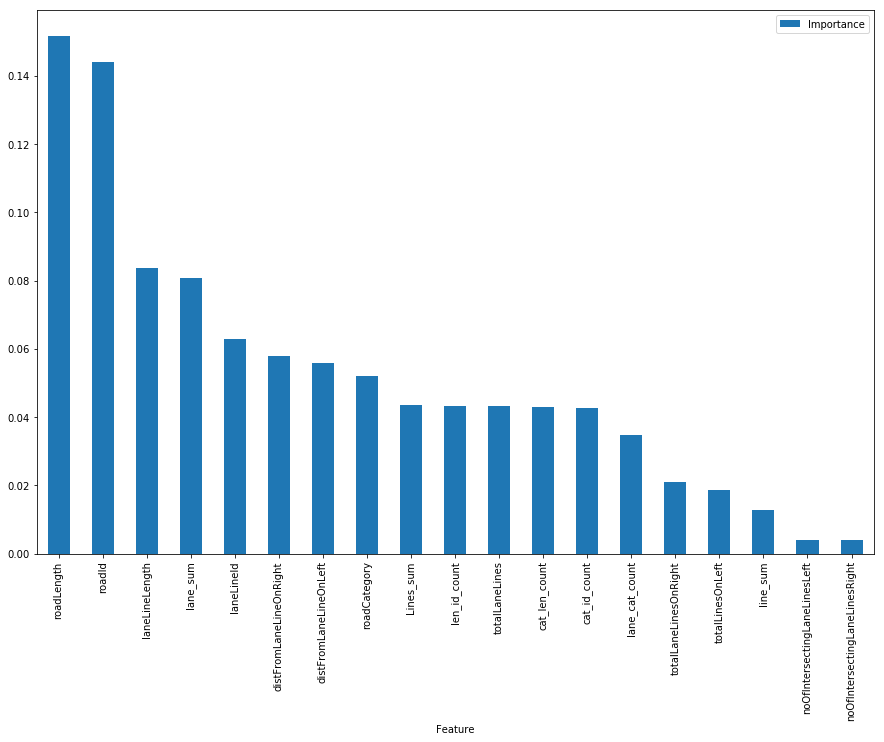

In [322]:
feature_importance = pd.Series(rf.feature_importances_)
feature_ser = pd.Series(features)
lis = pd.Series(feature_importance.values,index = feature_ser)
lis = sorted(lis.items(),key =lambda x:(-x[1],x[0]))
df = pd.DataFrame(lis, columns=['Feature', 'Importance'])
df.plot(kind='bar',x='Feature',figsize=(15,10))

In [323]:
pred2 = rf.predict(test[features])
print('prediction is done')

prediction is done


In [319]:
sub2 = pd.DataFrame()
sub2['roadId'] = test['roadId']
sub2['noOfLanes'] = pred2
sub2.to_csv('xgb.csv', index=False)
print('writting is done.')

writting is done.


In [232]:
sub['noOfLanes'] = (sub1['noOfLanes'] +sub2['noOfLanes'])//2

In [233]:
sub.head()

,roadId,noOfLanes
0,291531296,3
1,291531296,4
2,291531296,4
3,291531296,3
4,291531296,3


In [234]:
sub.to_csv('xgb.csv', index=False)
print('writting is done.')

writting is done.


In [235]:
x = sub.drop_duplicates(subset=['roadId'],keep='last')
x.to_csv('xgb.csv', index=False)
print('writting is done.')

writting is done.


In [56]:
from sklearn.linear_model import LogisticRegression

In [82]:
lr = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C= 1.0, fit_intercept=True, intercept_scaling=1, 
                        random_state=2017, solver='newton-cg', max_iter=1000, multi_class='multinomial', verbose=0,
                        warm_start=True, n_jobs=-1)

In [83]:
lr.fit(train[features],train['noOfLanes'])
print('fitting is done')

fitting is done


In [84]:
pred = lr.predict(test[features])
print('prediction is done')

prediction is done


In [85]:
sub = pd.DataFrame()
sub['roadId'] = test['roadId']
sub['noOfLanes'] = pred
sub.to_csv('lr.csv', index=False)
print('writting is done.')

writting is done.


In [17]:
from sklearn.ensemble import VotingClassifier

In [351]:
eclf = VotingClassifier(estimators=[('xgb',xgb), ('ovr', ovr)], voting='hard')

In [352]:
eclf.fit(train[features],train['noOfLanes'])
print('fitting is done')

fitting is done


In [353]:
pred = eclf.predict(test[features])
print('prediction is done')

prediction is done


In [354]:
sub = pd.DataFrame()
sub['roadId'] = test['roadId']
sub['noOfLanes'] = pred
sub.to_csv('xgb.csv', index=False)
print('writting is done.')

writting is done.


In [245]:
from sklearn.multiclass import OneVsRestClassifier

In [274]:
xgb1 = XGBClassifier(learning_rate =0.01, n_estimators=1000, max_depth=6,
                    min_child_weight=3, gamma=0.01, subsample=0.8, colsample_bytree=0.8,
                    objective= 'binary:logistic', nthread=4, seed=2017)

In [350]:
ovr = OneVsRestClassifier(estimator=rf,n_jobs=-1)

In [276]:
ovr.fit(train[features],train['noOfLanes'])

OneVsRestClassifier(estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0.01, learning_rate=0.01,
       max_delta_step=0, max_depth=6, min_child_weight=3, missing=None,
       n_estimators=1000, nthread=4, objective='binary:logistic',
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=2017,
       silent=True, subsample=0.8),
          n_jobs=-1)

In [277]:
pred = ovr.predict(test[features])
print('prediction is done')

prediction is done


In [278]:
sub = pd.DataFrame()
sub['roadId'] = test['roadId']
sub['noOfLanes'] = pred
sub.to_csv('xgb.csv', index=False)
print('writting is done.')

writting is done.


In [285]:
import lightgbm as lgb

In [295]:
params = { 
    'num_leaves' : 256,
    'learning_rate':0.03,
    'metric':'auc',
    'objective':'multiclass',
    'early_stopping_round': 40,
    'max_depth':10,
    'num_class':7,
    'bagging_fraction':0.5,
    'feature_fraction':0.6,
    'bagging_seed':2017,
    'feature_fraction_seed':2017,
    'verbose' : 1   
}

In [293]:
dtrain = lgb.Dataset(train[features],train['noOfLanes'])

In [296]:
lg = lgb.train(params, dtrain,num_boost_round=500,verbose_eval=20)

In [297]:
preds = lg.predict(test[features])

In [299]:
preds.argmax

<function ndarray.argmax>